### CF 6.4 -  Regression analysis - Part 3
This analysis will be similar to part 1, except I will only analyze cars that were returned

## the analysis will look at the impact of stolen value on returend value when only looking at automobiles
- Scatter plot
- R squared value

## 1 Import the scikit-learn library
Done

## 2 Import the needed libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
#name the path
path = r'C:\Users\laura\Documents\Continuting Education\Career Foundry\Advanced Analytics and Dashboards\Data Analytics Dashboard Project'

In [9]:
#import the data file
df_cargo_3 = pd.read_csv(os.path.join(path, 'Data Files', 'edited', 'CD_2023_Cleaned_3.csv'))

## Clean the file.

In [12]:
#Per lesson 6.3 I will remove the outliers from the 
filtered_df = df_cargo_3[df_cargo_3['stolen_value'] < 2689377]

In [14]:
filtered_df.shape

(190112, 48)

In [16]:
filtered_df.head()

,Unnamed: 0.1,Unnamed: 0,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,city_name,state_abbr,state_name,...,is_public_victim,is_prop_desc_other,is_prop_desc_purse,is_prop_desc_money,is_prop_desc_auto,is_prop_desc_tools,is_location_home,is_location_parking_lot,is_location_highway,is_perp_male
0,0,0,2019,NC0900200,Monroe,NaN,City,Monroe,NC,North Carolina,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2012,FL0530000,Polk,NaN,County,NaN,FL,Florida,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2012,FL0530000,Polk,NaN,County,NaN,FL,Florida,...,0,0,0,0,0,0,0,0,0,0
3,3,11,2012,SC0150000,Colleton,NaN,County,NaN,SC,South Carolina,...,0,0,0,0,0,0,0,1,0,0
4,4,12,2020,FL0139700,Miami Gardens,NaN,City,Miami Gardens,FL,Florida,...,0,0,0,0,0,0,0,0,1,0


In [24]:
# I will also limit the data to only containing recovered items. This way the model is just predicting the recovered value, not whether the item was recovered
filtered_df_auto = filtered_df[(filtered_df['is_recovered'] == 1) & (filtered_df['prop_desc_name'] == 'Automobile')]

In [26]:
filtered_df_auto.head()

,Unnamed: 0.1,Unnamed: 0,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,city_name,state_abbr,state_name,...,is_public_victim,is_prop_desc_other,is_prop_desc_purse,is_prop_desc_money,is_prop_desc_auto,is_prop_desc_tools,is_location_home,is_location_parking_lot,is_location_highway,is_perp_male
191,191,211,2012,MI6160400,Muskegon Heights,NaN,City,Muskegon Heights,MI,Michigan,...,0,0,0,0,1,0,0,0,1,1
194,194,214,2012,SC0150000,Colleton,NaN,County,NaN,SC,South Carolina,...,0,0,0,0,1,0,1,0,0,0
195,195,215,2015,MA0071800,Springfield,NaN,City,Springfield,MA,Massachusetts,...,0,0,0,0,1,0,0,1,0,0
197,197,217,2015,SC0040000,Anderson,NaN,County,NaN,SC,South Carolina,...,0,0,0,0,1,0,1,0,0,0
200,200,220,2012,MI6160400,Muskegon Heights,NaN,City,Muskegon Heights,MI,Michigan,...,0,0,0,0,1,0,0,0,1,0


In [28]:
filtered_df_auto.shape

(8211, 48)

In [26]:
# The dataframe contains  over 8000 rows. This should be enough for analysis

## Create a scatter plot of the data

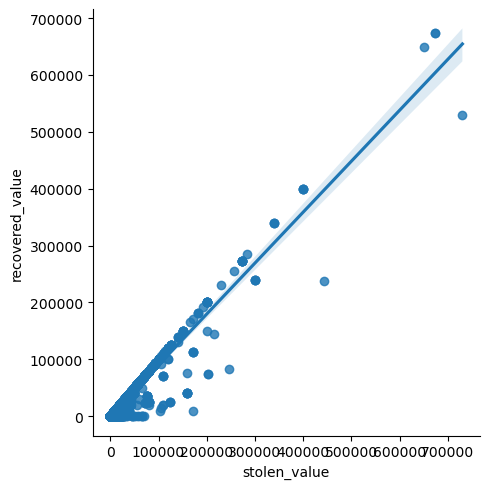

In [30]:

sns.lmplot(x = 'stolen_value', y = 'recovered_value', data = filtered_df_auto)
plt.show()

In [32]:
#From the inital analysis, it does look like the line of best fit is much better for this category

## Hypothesis: The greater the stolen vlaue, the greater the recovered value

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = filtered_df_auto['stolen_value'].values.reshape(-1,1)
y = filtered_df_auto['recovered_value'].values.reshape(-1,1)

In [36]:
X

array([[ 1500],
       [ 5000],
       [ 1000],
       ...,
       [17000],
       [17000],
       [ 3000]], dtype=int64)

In [38]:
y

array([[ 1500],
       [    1],
       [ 1000],
       ...,
       [17000],
       [17000],
       [    1]], dtype=int64)

## Split the data into training data and test data


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Anlaysis

In [44]:
regression = LinearRegression() 

In [46]:
#run the data with the training set

In [48]:
regression.fit(X_train, y_train)

LinearRegression()

In [50]:
#predict the values of y using x
y_predicted = regression.predict(X_test)

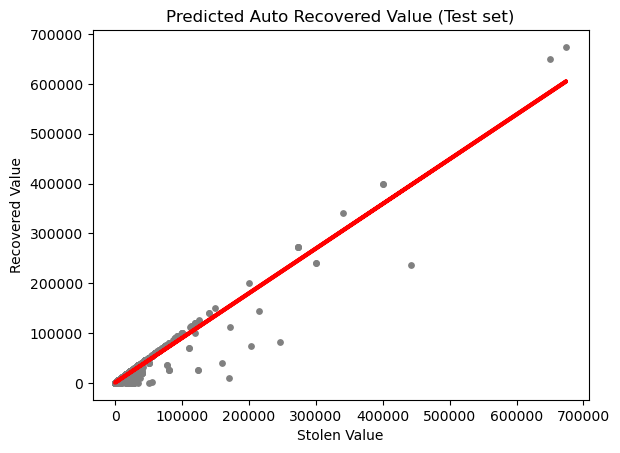

In [52]:
#regression line with test set data
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Predicted Auto Recovered Value (Test set)')
plot_test.xlabel('Stolen Value')
plot_test.ylabel('Recovered Value')
plot_test.show()

## How well do I think the line fits the data


In [54]:
# This line does look like it is a good fit for the data

## Check the model performance statistics

In [57]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.89647149]]
Mean squared error:  68243537.161696
R2 score:  0.9332011026652491


## Compare the predicted Y and predicted X

In [62]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6000,5899.470221
1,20000,18450.071103
2,2500,3210.055747
3,15000,13967.713645
4,5000,5002.998730
5,10000,9485.356188
6,5000,5002.998730
7,2500,2761.820001
8,1000,1417.112764
9,1,521.537744


## Concluding thoughts
By looking at items recovered and filtering for a specific property type, the data can be used to find a specific value if the property is recovered.
So the analysis seems to say that property type does impact return value and that for automobiles, the higher the initial value, the higher the return value. 

Another interesting finding is that some return values are $1. From the background information I have, it is difficult to determine if this is an error or if it signifies that the property was returned and is no longer usable. For now I will keep this data in the dataset.
